# **Download the Dependencies**

In [ ]:
!pip -q install llama-index-llms-huggingface llama-index llama-index-vector-stores-pinecone llama-index-embeddings-huggingface llama-index-embeddings-instructor



(https://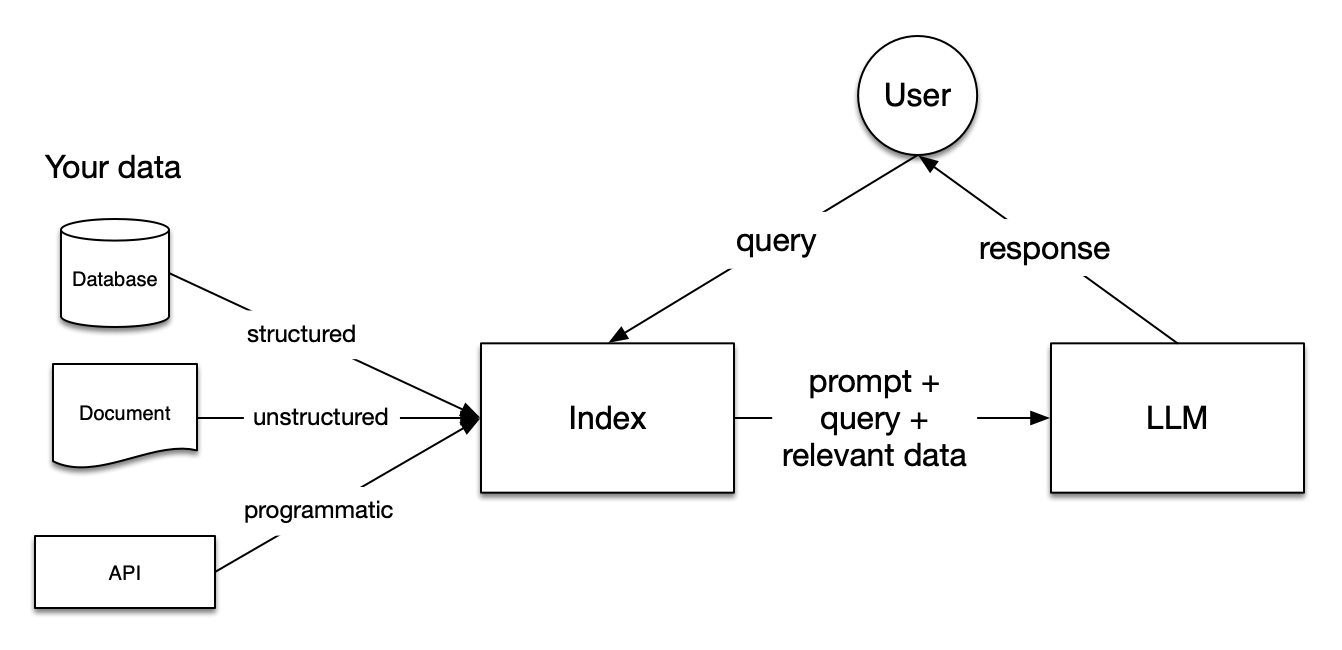)

# **stages of RAG**

The are five key stages within RAG, which in turn will be a part of any larger application you build. These are:

Loading: this refers to getting your data from where it lives -- whether it's text files, PDFs, another website, a database, or an API -- into your pipeline. LlamaHub provides hundreds of connectors to choose from.

Indexing: this means creating a data structure that allows for querying the data. For LLMs this nearly always means creating vector embeddings, numerical representations of the meaning of your data, as well as numerous other metadata strategies to make it easy to accurately find contextually relevant data.

Storing: once your data is indexed you will almost always want to store your index, as well as other metadata, to avoid having to re-index it.

Querying: for any given indexing strategy there are many ways you can utilize LLMs and LlamaIndex data structures to query, including sub-queries, multi-step queries and hybrid strategies.

Evaluation: a critical step in any pipeline is checking how effective it is relative to other strategies, or when you make changes. Evaluation provides objective measures of how accurate, faithful and fast your responses to queries

In [1]:
!pip -q install llama-index-llms-huggingface llama-index llama-index-vector-stores-pinecone llama-index-embeddings-huggingface llama-index-embeddings-instructor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

# **Load the Data**

In [2]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [3]:
loader=SimpleDirectoryReader('/content/data')
documents=loader.load_data()

In [ ]:
documents

# **Define the embedding model**

In [6]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
embed_model=HuggingFaceEmbedding(model_name="sentence-transformers/all-mpnet-base-v2")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **Define the Prompt**

In [7]:
from llama_index.core import PromptTemplate

In [8]:
from llama_index.llms.huggingface import HuggingFaceLLM

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [9]:
system_prompt=""""<|SYSTEM|># You are a Q&A assistant. Your goal is to answer questions as
accurately as possible based on the instructions and context provided

"""

In [10]:
# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

# **Define the llm model**

In [12]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [13]:
import torch
llm=HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="mistralai/Mistral-7B-Instruct-v0.1",
    model_name="mistralai/Mistral-7B-Instruct-v0.1",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.float16}

)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

# **Indexing the data**

In [75]:
from llama_index.core import ServiceContext

Service_Context=ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    embed_model=embed_model,
    chunk_overlap=120
)

<ipython-input-75-b3e0f15b44f2>:3: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  Service_Context=ServiceContext.from_defaults(


In [76]:
from llama_index.core import VectorStoreIndex

In [77]:
index=VectorStoreIndex.from_documents(documents,service_context=Service_Context)

In [78]:
query_engine=index.as_query_engine(k=1)

In [79]:
result=query_engine.query("what is Peft ?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [80]:
result.response

'PeFT stands for Parameter Efficient Fine-tuning. It is a technique used in natural language processing (NLP) to fine-tune pre-trained language models (PLMs) on a smaller dataset. PeFT allows for selective or not updating pretrained parameters, which helps to avoid overfitting. There has been a surge in interest in PeFT methods, and several surveys have been conducted on the topic. However, existing surveys have limitations, such as not covering much of the latest work in the field or not performing relevant experiments. In this work, the authors aim to provide a comprehensive and systematic study of PeFT methods for PLMs in NLP, including categorizing the methods, providing detailed explanations of the ideas and specific implementations, comparing the similarities and differences among various types of PeFT methods, and conducting extensive fine-tuning experiments with 11 representative PeFT methods.'

In [ ]:
result

In [21]:
print(result)

PEFT stands for "Parameter-Efficient Fine-Tuning" and is a deep learning technique used to reduce the number of trainable parameters while still maintaining comparable performance to the full fine-tuning. PEFT updates only a small number of additional parameters or updates a subset of the pretrained parameters, preserving the knowledge captured by the PLM while adapting it to the target task and reducing the risk of catastrophic forgetting.


In [22]:
from IPython.display import Markdown, display

In [23]:
display(Markdown(f"<b>{result}</b>"))

<b>PEFT stands for "Parameter-Efficient Fine-Tuning" and is a deep learning technique used to reduce the number of trainable parameters while still maintaining comparable performance to the full fine-tuning. PEFT updates only a small number of additional parameters or updates a subset of the pretrained parameters, preserving the knowledge captured by the PLM while adapting it to the target task and reducing the risk of catastrophic forgetting.</b>

# **Storing the data**

In [ ]:
# fixing unicode error in google colab
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [66]:
import os
import pinecone

PINECONE_API_KEY = os.environ.get('PINECONE_API_KEY', '48180f5d-52d0-49e6-b8b5-89638588ed95')
PINECONE_API_ENV = os.environ.get('PINECONE_API_ENV', 'gcp-starter')

# Create a Pinecone instance for initialization
pinecone_client = pinecone.Pinecone(
    api_key=PINECONE_API_KEY,
    environment=PINECONE_API_ENV
)

# Now you can use pinecone_client to interact with Pinecone
# For example, to list existing indexes:
existing_indexes = pinecone_client.list_indexes()
print(existing_indexes)

{'indexes': [{'dimension': 768,
              'host': 'rushi-5xyrzmy.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'rushi',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}}]}


In [67]:
pinecone_index = pinecone_client.Index("rushi")

In [68]:
from llama_index.vector_stores.pinecone import PineconeVectorStore
from llama_index.core import VectorStoreIndex
from llama_index.core import StorageContext

In [69]:
vector_store = PineconeVectorStore(
    pinecone_index=pinecone_index, namespace="test_05_14"
)

In [70]:
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [71]:
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context,embed_model=embed_model
)

Upserted vectors:   0%|          | 0/47 [00:00<?, ?it/s]

# **Quering the data**

In [72]:
query_engine = index.as_query_engine(llm=llm)

In [73]:
result3=query_engine.query("what is peft?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [74]:
result3.response

'PEFT stands for "Parameter-Efficient Fine-Tuning" and is a deep learning technique used to reduce the number of trainable parameters while still maintaining comparable performance to the full fine-tuning. PEFT updates only a small number of additional parameters or updates a subset of the pretrained parameters, preserving the knowledge captured by the PLM while adapting it to the target task and reducing the risk of catastrophic forgetting.'